# Plotting Query Results

## Setup

In [6]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

In [8]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [13]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///Input/emoji.sqlite", echo=False)

## Explore Database

In [14]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [21]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for i in columns:
    print(i['name'], i['type'])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [30]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('select * from emoji limit 10').fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect Database and Query

In [25]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
emoji = Base.classes.emoji

In [26]:
# Start a session to query the database
session = Session(engine)

## Query to get the Emoji Data

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [32]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
results = session.query(emoji.emoji_char, emoji.emoji_id, emoji.score).order_by(emoji.score.desc()).all()
results

[('😂', '1F602', 1814832150),
 ('❤️', '2764', 840619939),
 ('😍', '1F60D', 680382416),
 ('♥️', '2665', 652715459),
 ('😭', '1F62D', 515991922),
 ('😊', '1F60A', 484540701),
 ('♻️', '267B', 452489849),
 ('😒', '1F612', 441690175),
 ('💕', '1F495', 381679908),
 ('😘', '1F618', 377847645),
 ('😩', '1F629', 343967555),
 ('☺️', '263A', 333263710),
 ('👌', '1F44C', 311468371),
 ('😔', '1F614', 283873968),
 ('😏', '1F60F', 275930731),
 ('😁', '1F601', 268504794),
 ('⬅️', '2B05', 225109999),
 ('😉', '1F609', 210995480),
 ('👍', '1F44D', 186214004),
 ('😌', '1F60C', 180720579),
 ('🙏', '1F64F', 175057316),
 ('🎶', '1F3B6', 170127733),
 ('😢', '1F622', 166417040),
 ('😎', '1F60E', 160872106),
 ('😅', '1F605', 160434523),
 ('👀', '1F440', 159984970),
 ('😳', '1F633', 156664610),
 ('🙌', '1F64C', 154175844),
 ('💔', '1F494', 152572644),
 ('🙈', '1F648', 148162690),
 ('✌️', '270C', 143975239),
 ('✨', '2728', 139984564),
 ('💙', '1F499', 139339131),
 ('💜', '1F49C', 137264417),
 ('💯', '1F4AF', 134780880),
 ('😴', '1F634', 1308

Unpack tuples using list comprehensions

In [34]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
emoji_id = [i[1] for i in results[:10]]
scores = [i[2] for i in results[:10]]

## Plot using Matplotlib

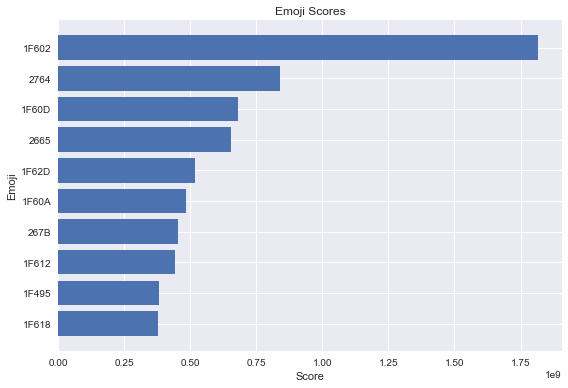

In [36]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax = plt.subplots()
y = range(1,len(scores)+1)
ax.barh(y, scores[::-1])
ax.set_xlabel('Score')
ax.set_ylabel('Emoji')
ax.set_yticks(y)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title('Emoji Scores')
fig.tight_layout()
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [44]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
df.set_index('emoji_id', inplace=True)
df.head(10)

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

<AxesSubplot:title={'center':'Emoji Ranking'}, ylabel='emoji_id'>

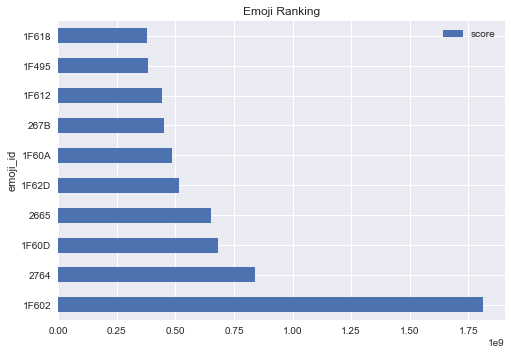

In [39]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.plot.barh(title='Emoji Ranking')

In [54]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
df2 = pd.DataFrame(session.query(emoji.emoji_char, emoji.emoji_id, emoji.score).order_by(emoji.score.desc()).limit(10),
                   columns=['emoji_char','emoji_id', 'emoji_score'])
df2.set_index('emoji_id', inplace=True)
df2

,emoji_char,emoji_score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908
